딥러닝 1일차 
--

도움되는 공부 사이트: 

http://cs231n.stanford.edu/?gclid=CjwKCAjwzruGBhBAEiwAUqMR8NPEC6s9zLwThdoX4mEsFM2HzEjQzMIn1-axAlfpCBNrMiF3wI1gLBoCe_8QAvD_BwE

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!nvidia-smi

Thu Jun  3 03:27:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# tf.function을 사용하지 않는 경우
def square_pos(x):
    if x>0:
        x=x*x
    else:
        x=x*(-1)
    return x
square_pos

<function __main__.square_pos>

In [ ]:
# tensorflow로 작동
# @tf.function # class -> def __init__(self,a,b) /  def __del__(self, a, b) -> public
# def __init__(self,a,b) 외부에서 코드는 보이지만 접근이 불가(절대로 하지 마세요.)
# 골뱅이classmethod 
# 골뱅이staticmethod

@tf.function # function -> tensorflow로 작동해주세요.

def square_pos(x):
    if x>0:
        x=x*x
    else:
        x=x*(-1)
    return x
square_pos

In [ ]:
import tensorflow as tf
# seed: 재현가능성 때문에 실시

tf.random.set_seed(777)

import numpy as np
from tensorflow.keras.models import Sequential # 텐서플로우에 있는 것을 layer(층)을 하나하나 쌓겠다(Sequential).
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

In [ ]:
# 데이터 준비하기
# OR 문제
X=np.array([[0,0],[1,0],[0,1],[1,1]])
y=np.array([[0],[1],[1],[1]])

In [ ]:
# 모델 구성하기
model=Sequential()

# 단일 퍼셉트론을 구성
model.add(Dense(1,input_shape=(2,), activation='linear'))

# 다중 퍼셉트론을 구성하고 싶다면?
# model.add(Dense(32, input_shape= (2,), activation='linear' ))

# 모델 준비 -> 평가(평가지표도 넣고 loss_
model.compile(optimizer = 'SGD', loss=mse, metrics=['acc'])

- overfitting에 빠짐

In [ ]:
# 학습시키기
# 머신러닝에서의 fit과 같음

model.fit(X,y, epochs=500)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.9005 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[0.49431452],
        [0.37552655]], dtype=float32), array([0.3271933], dtype=float32)]

- 다중 퍼셉트론으로 overfitting에서 나오기

In [ ]:
# 모델 구성하기
model=Sequential()

# 단일 퍼셉트론을 구성
#model.add(Dense(1,input_shape=(2,), activation='linear'))

# 다중 퍼셉트론을 구성하고 싶다면?
model.add(Dense(32, input_shape= (2,), activation='linear' ))

# 모델 준비 -> 평가(평가지표도 넣고 loss_
model.compile(optimizer = 'SGD', loss=mse, metrics=['acc'])

In [ ]:
model.fit(X,y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 307ms/step - loss: 0.8586 - acc: 0.2500
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8571 - acc: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 0.8556 - acc: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 0.8541 - acc: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8526 - acc: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8511 - acc: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8496 - acc: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.8481 - acc: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8466 - acc: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.8451 - acc: 0.0000e+00
Epoch 11/500
1/1 [====================

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[ 0.08123325,  0.30389872,  0.24679478, -0.14164759,  0.28630447,
         -0.15828423,  0.0299254 ,  0.04210912, -0.19632214,  0.2521813 ,
          0.07444475, -0.14096588, -0.19682857, -0.04683502, -0.20901853,
          0.2116418 ,  0.39599252,  0.00189971, -0.09785528,  0.02549364,
          0.4686057 ,  0.17816263,  0.18119322, -0.18102086,  0.23965536,
          0.37659866,  0.22412664, -0.02069837,  0.24929483,  0.2930168 ,
         -0.19856828,  0.41364226],
        [-0.07518003, -0.01295003,  0.3582184 , -0.11722757,  0.28415087,
         -0.1702844 ,  0.10868735,  0.01031877, -0.01068234, -0.00801004,
          0.1309964 , -0.11060582, -0.11042546,  0.43687144,  0.5073709 ,
          0.33435637,  0.19593652, -0.12418193, -0.01775091,  0.20956878,
          0.2008836 ,  0.28940824,  0.3978716 ,  0.21557856,  0.36493596,
         -0.06256573,  0.42474613,  0.2596911 , -0.00982242, -0.21440764,
          0.2526135 , -0.07609937]], dtype=float32),
 array([0.21856631, 0.1

Activation 그려보기 (함수 그려보기)
--

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivative(f, z, eps=0.00001):
    return (f(z+eps)-f(z-eps))/(2*eps)

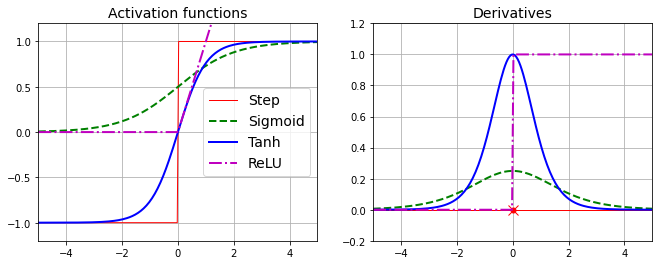

In [ ]:
import matplotlib.pyplot as plt


z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

2021/06/01
--

In [ ]:
tf.random.set_seed(777)

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

# 데이터 준비하기
# OR문제

x=np.array([[0,0],[1,0],[0,1],[1,1]])
y=np.array([[0],[1],[1],[1]])

In [ ]:
# 모델 구성하기
model=Sequential()

#단일 퍼셉트론 구성
model.add(Dense(1, input_shape=(2,), activation='linear'))

# loss function, 평가지표를 정함
model.compile(optimizer='SGD', loss=mse, metrics=['acc'])

model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 221ms/step - loss: 1.4290 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.900

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[ 0.69776404],
        [-0.18438019]], dtype=float32), array([0.49703857], dtype=float32)]

In [ ]:
x_data=[[0.,0.],[0.,1.],[1.,0.],[1.,1.]]
y_data=[[1.],[0.],[0.],[0.]]

# tf.keras를 활용한 perceptron 모델 구현
input_Layer=tf.keras.layers.Input(shape =(2,))
x=tf.keras.layers.Dense(2,activation='sigmoid')(input_Layer)
Output_Layer=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=[input_Layer],outputs=[Output_Layer])
model.summary()

# 모델 loss, 학습방법 결정
optimizer=tf.keras.optimizers.SGD(lr=0.7)
loss=tf.keras.losses.binary_crossentropy
metrics=tf.keras.metrics.binary_crossentropy

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


MNIST dataset with perceptron
--

In [ ]:
import tensorflow as tf

(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


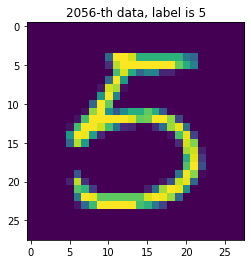

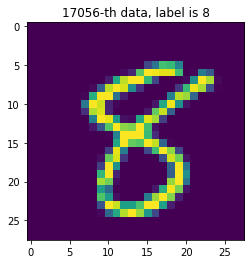

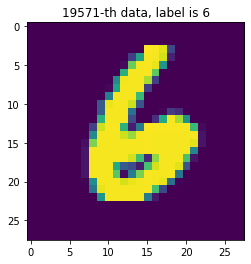

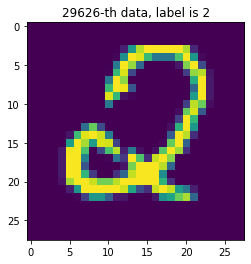

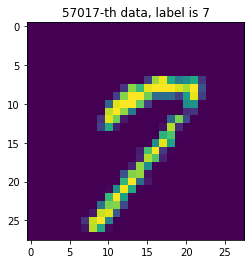

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_size=5
random_idx=np.random.randint(60000, size=sample_size)

for idx in random_idx:
    img=X_train[idx,:]
    label=y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data, label is %d' %(idx,label))

In [ ]:
# 검증 데이터 만들기
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터 8:2의 비율로 분리
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=777)

print(f'훈련 데이터 {X_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {X_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (48000, 28, 28) 레이블 (48000,)
검증 데이터 (12000, 28, 28) 레이블 (12000,)


In [ ]:
num_X_train=X_train.shape[0] #48000
num_X_val=X_val.shape[0] #12000
num_X_test=X_test.shape[0] #12000

# 머신러닝 전처리 할 때, scaler 안 씀 -> 영향이 없기 때문에
# 딥러닝에서는 전처리 할 떄 scaler를 안 쓰면 안 됨 -> 이미지 -~255 -> normalization

X_train=(X_train.reshape((num_X_train,28*28)))/255
X_val=(X_val.reshape((num_X_val, 28*28)))/255
X_test=(X_test.reshape((num_X_test,28*28)))/255

In [ ]:
print(X_train.shape)

(48000, 784)


In [ ]:
y_train # label encoder -> one-hot encoding으로 바꿔줌

array([4, 0, 8, ..., 3, 4, 5], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
# 수치형이 아님 X 위에 데이터는 범주형(문자형)

y_train=to_categorical(y_train) # == Onehot encoding
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train.shape

(48000, 10)

In [ ]:
# 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
# 입력 데이터를 명시해야 됨.
# 784 차원의 데이터를 입력을 받고, 64개의 출력을 가지는 첫번째 Dense층

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m # 분모가 0이 되는 것을 방지 하기 위해 - m을 함
  arr = np.exp(arr)
  return arr/ np.sum(arr)

def sigmoid(x):
  return 1/(1+np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])
# 모델 버전이 업그레이드 되면서 tf.keras.losses.CategoricalCrossentropy() 이걸로 써야함

In [ ]:
# 모델 학습하기
history = model.fit(X_train, y_train,
                    epochs = 30,
                    batch_size = 1,
                    validation_data = (X_val,y_val))

In [ ]:

# 학습과정 설정하기.
model.compile(optimizer = 'adam', #옵티마이저 : Adam
              #손실함수 : categorical_crossentropy
              loss = 'categorical_crossentropy',
              # 모니터링 할 평가지표 : acc
              metrics = ['acc'])

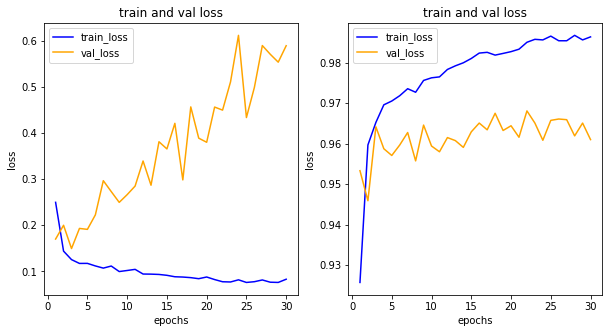

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()


plt.show()

모델 평가하기
--

In [ ]:
model.evaluate(X_test, y_test) # 앞에가 loss, 뒤에가 accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.5159 - acc: 0.9654


[0.5159446001052856, 0.965399980545044]

In [ ]:
import numpy as np

results = model.predict(X_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 :  {results[0]}')

(10000, 10)
각 클래스에 속할 확률 :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


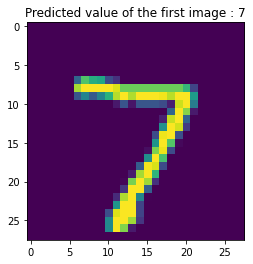

In [ ]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) #  가장 큰 값의 인덱스를 가져옴
plt.imshow(X_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' +str(arg_results[0]))
plt.show()

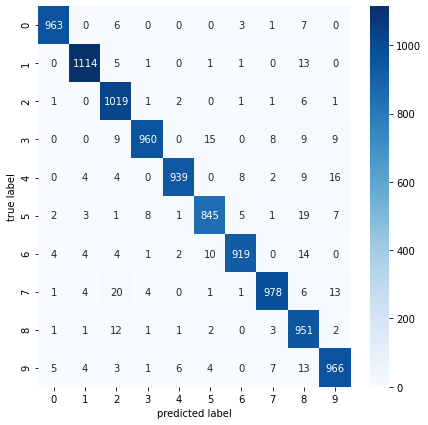

In [ ]:
#모델 평가 방법 1 -> 혼동행렬

#sklearn.metrics 모듈을 여러 가지 평가지표에 관한 기능을 제공함.

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#혼동행렬을 만듬.
plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
#분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.99      0.96      1032
           3       0.98      0.95      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.96      0.95      0.95       892
           6       0.98      0.96      0.97       958
           7       0.98      0.95      0.96      1028
           8       0.91      0.98      0.94       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.96      0.97     10000
weighted avg       0.97      0.97      0.97     10000



HW) Fashion MNIST에서도 동일하게 해보자
--

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 MNIST 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

네트워크를 훈련하는데 60,000개의 이미지를 사용합니다. 그다음 네트워크가 얼마나 정확하게 이미지를 분류하는지 10,000개의 이미지로 평가하겠습니다. 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트하여 적재할 수 있습니다:

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


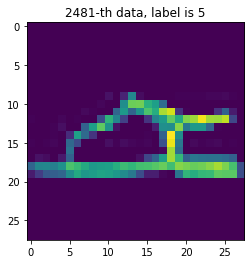

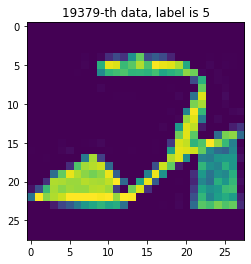

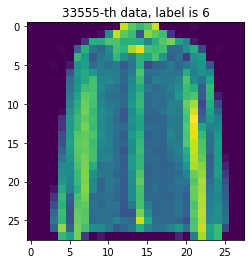

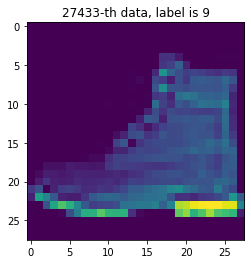

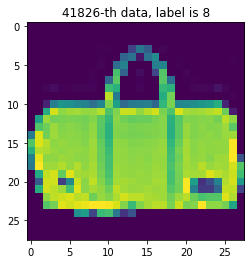

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 5 
# 0~59999이 범위에서 세 개의 정수를 뽑는다.
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
  img = train_images[idx, :]
  label = train_labels[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' %(idx, label))

In [ ]:
# train, test 데이터 설정해주기
x_train=train_images
y_train=train_labels
x_test=test_images
y_test=test_labels

In [ ]:
# 검증 데이터 만들기

import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 3개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

# 0 ~ 1 범위로 만듭니다.
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from sklearn.model_selection import train_test_split

#훈련/테스트 데이터를 0.8/0.2 의 비율로 분리

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =42) # test size는 테스트셋의 비율 의미. random_state는 재산성을 위해 사용(random_seed와 동일)

print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28, 1) 레이블 (42000, 10)
검증 데이터 (18000, 28, 28, 1) 레이블 (18000, 10)


In [ ]:
x_train.shape

(42000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
y_train.shape

(42000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
x_val.shape

(18000, 28, 28, 1)

In [ ]:
y_val.shape

(18000, 10)

In [ ]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m 
  arr = np.exp(arr)
  return arr/ np.sum(arr)

def sigmoid(x):
  return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)


np.set_printoptions(precision=3)
print(f'sigmoid {(sigmoid(x_train)).shape}, softmax {(softmax(y_train)).shape}')
print('\n')
print(f'sigmoid {(sigmoid(x_val)).shape}, softmax {(softmax(y_val)).shape}')
print('\n')
print(f'sigmoid {(sigmoid(x_test)).shape}, softmax {(softmax(y_test)).shape}')


np.set_printoptions(precision=3)
print((f'relu {(relu(x_train)).shape}, softmax {(softmax(y_train)).shape}'))
print('\n')
print(f'relu {(relu(x_val)).shape}, softmax {(softmax(y_val)).shape}')
print('\n')
print((f'relu {(relu(x_test)).shape}, softmax {(softmax(y_test)).shape}'))

sigmoid (42000, 28, 28, 1), softmax (42000, 10)


sigmoid (18000, 28, 28, 1), softmax (18000, 10)


sigmoid (10000, 28, 28, 1), softmax (10000, 10)
relu (42000, 28, 28, 1), softmax (42000, 10)


relu (18000, 28, 28, 1), softmax (18000, 10)


relu (10000, 28, 28, 1), softmax (10000, 10)


모델 학습시키기
--

 콜백(Callback) 사용하기
 

 tf.keras.callbacks 모듈의 Callback 클래스를 사용하면,

훈련 중에 손실 값이 특정 기준 미만이 되었을 때 훈련을 중단할 수 있습니다.


 출처1: https://github.com/KerasKorea/KEKOxTutorial/blob/master/10_Fashion-MNIST%20with%20tf.Keras/10_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98%20Hello%20World%2C%20Fashion-MNIST.md


ModelChceckpoint API (오류로 실패)

 ModelCheckpoint API를 사용하여 에폭(epoch)마다 모델을 저장할 수 있습니다. 검증 정확도(validation accuracy)가 향상되었을 때 저장하려면 save_best_only = True로 설정하면 됩니다.

 출처2: https://codetorial.net/tensorflow/fashion_mnist_classification.html


 class 오류때문에 포기:

NotImplementedError: Layer ModuleWrapper has arguments in `__init__` and therefore must override `get_config`. 

https://lsjsj92.tistory.com/598

In [ ]:
clss myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
            if logs.get('loss')<0.3:
                print('\n훈련을 중지합니다.')
                self.model.stop_training=True

SyntaxError: ignored

In [ ]:
callbacks=myCallback()

선생님 풀이방식

model= keras.Sequential([ keras.layers.Flatten(input_shape=Flatten(28,28))

Flatten으로 1차원으로 펼쳐줘서 계산하기 편하기 만들어줌으로써 결과값을 높임

모델 정확도 평가

2021/06/02 수업
--

오버피팅 빠지면 batch-normalization이나 dropout을 쓴다.

이 때, 절대로 batch-normalization이랑 dropout을 같이 쓰면 안 되는데, 이유는 같이 쓰면 정규분포의 오른쪽과 왼쪽꼬리를 임의로 전부 드랍시켜버리기 때문이다.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
import numpy as np

def softmax(arr):
  m = np.max(arr)
  arr = arr - m 
  arr = np.exp(arr)
  return arr/ np.sum(arr)

def sigmoid(x):
  return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(x_train)}, softmax {softmax(x_train)}')
print(f'sigmoid {sigmoid(x_test)}, softmax {softmax(x_test)}')

np.set_printoptions(precision=3)
print(f'relu {relu(x_train)}, softmax {softmax(x_train)}')
print(f'relu {relu(x_test)}, softmax {softmax(x_test)}')

In [ ]:
# 0과 1의 범위로 만들기
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

# (-1.28,28,1) 입력 이미지 크기 배열 차원

In [ ]:
from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형 형태로 변경합니다.
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
# val도 추가요

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
# 신경망의 레이어에서 입력 데이터 크기 정의

#  리스트 형태의 층 구성
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), #maxpooing에서 반절이 줄어듬  
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'), #Depth를 늘림.
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Flatten(), # Dense 층에 입력하기 위해 데이터를 펼쳐줍니다.
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망
])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)             

콜백(Callback) 사용하기

tf.keras.callbacks 모듈의 Callback 클래스를 사용하면,

훈련 중에 손실 값이 특정 기준 미만이 되었을 때 훈련을 중단할 수 있습니다.

출처1: https://github.com/KerasKorea/KEKOxTutorial/blob/master/10_Fashion-MNIST%20with%20tf.Keras/10_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98%20Hello%20World%2C%20Fashion-MNIST.md


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
            if logs.get('loss')<0.01:
                print('\n훈련을 중지합니다.')
                self.model.stop_training=True

In [ ]:
callbacks=myCallback()

In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

history=model.fit(x_train, y_train, 
          epochs = 100, 
          batch_size = 50, 
          validation_data = (x_val, y_val), callbacks=[callbacks])

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

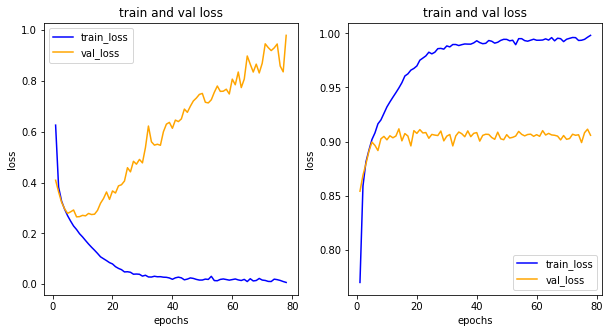

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()


plt.show()

In [ ]:
# 모델 평가하기

# 테스트 셋으로 모델 평가
score = model.evaluate(x_test, y_test)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.0469 - acc: 0.8978

 Test accuracy: 0.8978000283241272


In [ ]:
predictions = model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))

[6.165e-28 4.312e-38 1.131e-24 1.223e-23 7.634e-38 2.367e-14 9.160e-26
 4.135e-19 1.041e-32 1.000e+00]
9


용어 정리
--

Batch Normalization

미니배치의 Statistics를 이용
각각의 스칼라 Feature들을 독립적으로 정규화하는 방식으로 진행된다. 각각의 Feature들의 Mean 및 Variance를 0과 1로 정규화를 하는 것이다. 

이를 사용하면 높은 Learning Rate를 설정가능하여
결과적으로 더 빠른 트레이닝이 된다.

Loss function

Multi-class classification에서 많이 사용되는 softmax -> cross entropy loss

레이어 관련 설명
--

https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/



sparse_categorical_crossentropy를 쓰려면 원핫 인코딩으로 바꾸면 안 된다. 라벨 인코딩을 바로 받아들여 sparse하게 받아들여 sparse하게 받아들이기 때문에, 에러가 남.

class 구현
--

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터를 다운받습니다.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

첫 번째 모델 전처리

In [ ]:
x_train=train_images
y_train=train_labels
x_test=test_images
y_test=test_labels

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =777) # t

In [ ]:
# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
# val도 추가요
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(29400, 28, 28)
(29400,)
(10000, 28, 28)
(10000,)
(12600, 28, 28)
(12600,)


In [ ]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]
            
x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28)))/ 255
            
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

두 번째 모델 전처리

In [ ]:
a_train=train_images
b_train=train_labels
a_test=test_images
b_test=test_labels

In [ ]:
a_train = np.reshape(a_train / 255, (-1, 28, 28, 1))
a_test = np.reshape(a_test / 255, (-1, 28, 28, 1))

In [ ]:
b_train = to_categorical(b_train)
b_test = to_categorical(b_test)

In [ ]:
from sklearn.model_selection import train_test_split

a_train, a_val, b_train, b_val = train_test_split(a_train, b_train, 
                                                  test_size = 0.3, random_state = 777)

In [ ]:
print(a_train.shape)
print(a_test.shape)
print(b_train.shape)
print(b_test.shape)
print(a_val.shape)
print(b_val.shape)

(42000, 28, 28, 1)
(10000, 28, 28, 1)
(42000, 10)
(10000, 10)
(18000, 28, 28, 1)
(18000, 10)


클래스 할당

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import numpy
from keras.utils import np_utils

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
            if logs.get('loss')<0.10:
                print('\n훈련을 중지합니다.')
                self.model.stop_training=True

callbacks=myCallback()

class Model1:
    def __init__(self, x_train, y_train, x_val, y_val):
        self.x_train=x_train
        self.y_train=y_train
        self.x_val=x_val
        self.y_val=y_val
       
    def prev_model(x_train,y_train,x_val,y_val):
        model = Sequential([])
        
        model.add(Dense(64, activation = 'relu', input_shape = (784,) ) )
        model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
        model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

        return model

    def prev_summary(self):
        a=Model1.prev_model(x_train,y_train,x_val,y_val)
        b=a.summary()

        return b
    
    def prev_fit(self,x_train,y_train,x_val,y_val):           
        c=Model1.prev_model(x_train,y_train,x_val,y_val)
            
        c.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])
            
        history=c.fit(x_train, y_train, 
                      epochs = 10, 
                      batch_size = 5, 
                      validation_data = (x_val, y_val), callbacks=[callbacks])
            
        return history
        
        
class Model2:
    def __init__(self, a_train, b_train, a_val, b_val):
        self.a_train=b_train
        self.a_train=b_train
        self.a_val=b_val
        self.a_val=b_val

    def pres_model(a_train,b_train,a_val,b_val):
        #model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
        #Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
        #MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), #maxpooing에서 반절이 줄어듬  
        #Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'), #Depth를 늘림.
        #MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
        #Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
        #MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
        #Flatten(), # Dense 층에 입력하기 위해 데이터를 펼쳐줍니다.
        #Dense(64, activation = 'relu'),
        #Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망
        #])

        model = Sequential([])

        model.add(Conv2D(7, (3,3), padding='same', activation = 'relu', input_shape = (28, 28, 1)))
        model.add(MaxPool2D(pool_size = (2, 2)))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(10, activation='softmax'))

        #Conv2D(783, (391,391), padding='same', activation = 'relu', input_shape = (28, 28, 1)),
        #MaxPool2D(pool_size = (391, 391)), #maxpooing에서 반절이 줄어듬  

        #Conv2D(393, (197,197), padding='same', activation = 'relu'),
        #MaxPool2D(pool_size = (99, 99)), #maxpooing에서 반절이 줄어듬  

        #Conv2D(197, (99,99), padding='same', activation = 'relu'),
        #MaxPool2D(pool_size = (49, 49)), #maxpooing에서 반절이 줄어듬  

        #Conv2D(99, (49,49), padding='same', activation = 'relu'),
        #MaxPool2D(pool_size = (7, 7)), #maxpooing에서 반절이 줄어듬  

        #Conv2D(49, (7,7), padding='same', activation = 'relu'),
        #MaxPool2D(pool_size = (3, 3)), #maxpooing에서 반절이 줄어듬  

        #Conv2D(7, (3,3), padding='same', activation = 'relu'),
        #MaxPool2D(pool_size = (2, 2)), #maxpooing에서 반절이 줄어듬 

        #Flatten(), # Dense 층에 입력하기 위해 데이터를 펼쳐줍니다.
        #Dense(32, activation = 'relu'),
        #Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망
        #])

        return model

    def pres_summary(self):
        a=Model2.pres_model(a_train,b_train,a_val,b_val)
        b=a.summary()

        return b
    
    def pres_fit(self,a_train,b_train,a_val,b_val):
        c=Model2.pres_model(a_train,b_train,a_val,b_val)

        c.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])
        
        history2=c.fit(a_train, b_train, 
                      epochs = 10, 
                      batch_size = 5, 
                      validation_data = (a_val, b_val), callbacks=[callbacks])
        return history2

In [ ]:
pey=Model1(x_train,y_train,x_test,y_test)

In [ ]:
pey.prev_summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_67 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_68 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pey.prev_fit(x_train,y_train,x_val,y_val)

In [ ]:
pey2=Model2(a_train,b_train,a_test,b_test)

In [ ]:
pey2.pres_summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 7)         70        
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 7)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1372)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                87872     
_________________________________________________________________
dense_70 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_71 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_72 (Dense)             (None, 10)              

In [ ]:
history=pey2.pres_fit(a_train,b_train,a_val,b_val)

Epoch 1/10
8400/8400 [==============================] - 25s 3ms/step - loss: 0.5025 - acc: 0.8193 - val_loss: 0.3455 - val_acc: 0.8742
Epoch 2/10
8400/8400 [==============================] - 25s 3ms/step - loss: 0.3247 - acc: 0.8819 - val_loss: 0.3274 - val_acc: 0.8842
Epoch 3/10
8400/8400 [==============================] - 24s 3ms/step - loss: 0.2831 - acc: 0.8961 - val_loss: 0.2880 - val_acc: 0.8962
Epoch 4/10
8400/8400 [==============================] - 24s 3ms/step - loss: 0.2534 - acc: 0.9066 - val_loss: 0.3089 - val_acc: 0.8911
Epoch 5/10
8400/8400 [==============================] - 25s 3ms/step - loss: 0.2332 - acc: 0.9124 - val_loss: 0.2907 - val_acc: 0.9021
Epoch 6/10
8400/8400 [==============================] - 25s 3ms/step - loss: 0.2162 - acc: 0.9191 - val_loss: 0.2821 - val_acc: 0.9000
Epoch 7/10
8400/8400 [==============================] - 25s 3ms/step - loss: 0.1997 - acc: 0.9262 - val_loss: 0.2780 - val_acc: 0.9054
Epoch 8/10
8400/8400 [==============================] -

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

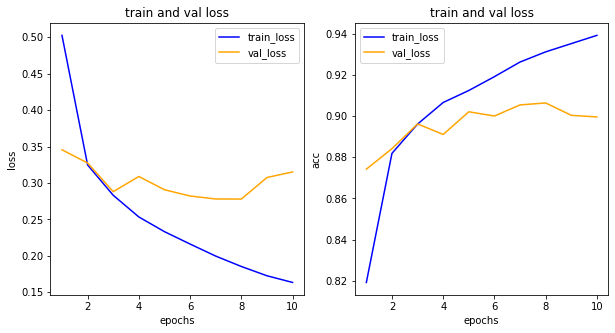

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


plt.show()

CIFAR
--

In [ ]:
# 사용할 라이브러리 불러오기
import numpy as np
# 숫자 -> One-hot Vector 를 위한 라이브러리
from keras.utils import np_utils
# CIFAR-10 Dataset을 가져오기 위한 라이브러리
from keras.datasets import cifar10, mnist
# 순차적인 모델을 만들기 위한 Sequential 함수
from keras.models import Sequential
# CNN 및 MLP에 필요한 각 층들
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
# 드롭아웃 적용을 위한 층
from keras.layers import Dropout
# 배치 정규화 적용을 위한 층
from keras.layers import BatchNormalization
# L2 정규화를 위한 라이브러리
from keras.regularizers import l2
# Google Colab에서 이미지를 보기 위한 cv2_imshow 함수
from google.colab.patches import cv2_imshow

170508288/170498071 [==============================] - 6s 0us/step
x_train : (50000, 32, 32, 3)
y_train : (50000, 1)
x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


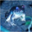

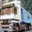

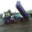

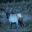

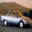

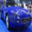

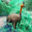

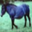

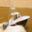

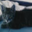

In [ ]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))
print('x_test :', np.shape(x_test))
print('y_test :', np.shape(y_test))
# 한 번 Training Dataset의 이미지 10개 정도 봅시다
for i in range(10):
  cv2_imshow(x_train[i])

In [ ]:
# Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 만들어줍니다
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 이번엔 Test Dataset을 Validation Set으로 써봅니다
# One-Hot Encoding (숫자 -> One-Hot Vector) 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('y_train :', np.shape(y_train))

y_train : (50000, 10)


2021/06/03 수업
--

In [ ]:

# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN_Upgraded')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
# padding : 'same'일 경우 입력과 출력 모양이 같도록 0을 주변에 덧댄다
# elu : ReLU 보다 발전된 형태의 활성화 함수 ELU를 써봅니다
# kernel_regularizer : 가중치 규제를 정해줄 수 있습니다. / l2(lambda) : 가중치의 L2 Norm을 목적 함수에 추가하며, lambda에 따라 곱해지는 상수값을 정합니다.
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001),
                 input_shape=(width, height, channel), activation='elu'))
model.add(BatchNormalization()) # BatchNormalization() : 배치 정규화를 위한 층을 추가합니다
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) # Dropout(rate) : 앞의 층에 드롭아웃을 적용합니다. rate 값에 따라 없애고 학습할 노드 비율을 정합니다.
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN_Upgraded"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64

In [ ]:
# 모델 학습과정 설정하기
# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, Adam을 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 출력할지 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=30,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 42s 7ms/step - loss: 2.0929 - acc: 0.3993 - val_loss: 1.0682 - val_acc: 0.6461
Epoch 2/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1006 - acc: 0.6426 - val_loss: 0.9948 - val_acc: 0.6824
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9022 - acc: 0.7125 - val_loss: 0.8112 - val_acc: 0.7507
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8102 - acc: 0.7484 - val_loss: 0.9589 - val_acc: 0.7144
Epoch 5/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7435 - acc: 0.7774 - val_loss: 0.8267 - val_acc: 0.7550
Epoch 6/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7113 - acc: 0.7951 - val_loss: 0.7762 - val_acc: 0.7852
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6848 - acc: 0.8087 - val_loss: 0.7746 - val_acc: 0.7828
Epoch 8/30
1563/1563 [==============================] - 1

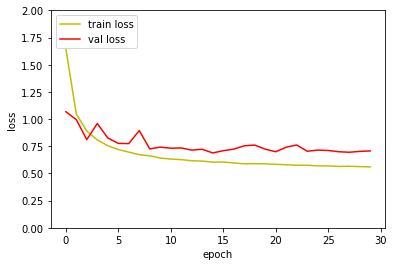

In [ ]:
# 그래프를 그리기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기 
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
# y축 범위 설정
plt.ylim([0.0, 2.0])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

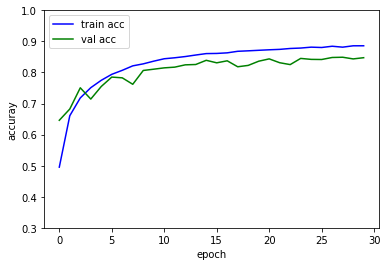

In [ ]:
# Training Accuracy VS Validation Accuracy 비교를 위한 그래프 그리기 
plt.plot(hist.history['acc'], 'b', label='train acc')
plt.plot(hist.history['val_acc'], 'g', label='val acc')
# y축 범위 설정
plt.ylim([0.3, 1.0])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuray')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
# 그래프 그리기
plt.show()

In [ ]:
#모델 평가
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7071 - acc: 0.8476
Test set Loss and Accuracy
[0.7071157097816467, 0.847599983215332]


예측: 고양이 / 정답: 고양이


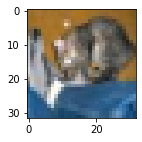

예측: 배 / 정답: 배


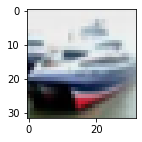

예측: 배 / 정답: 배


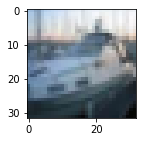

예측: 비행기 / 정답: 비행기


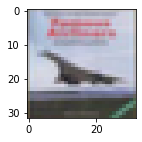

예측: 개구리 / 정답: 개구리


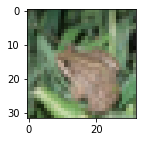

예측: 개 / 정답: 개구리


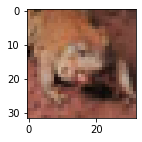

예측: 트럭 / 정답: 자동차


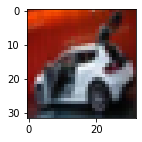

예측: 사슴 / 정답: 개구리


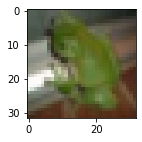

예측: 고양이 / 정답: 고양이


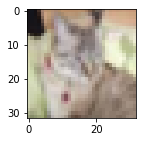

예측: 자동차 / 정답: 자동차


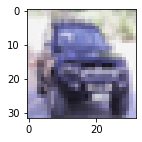

In [ ]:
#모델 사용하기
# 이미지의 종류가 무엇인지에 대한 리스트
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용 
  output = model.predict(x_test[i].reshape(1,width, height, channel))
  
  # 이미지 출력 
  plt.imshow(x_test[i].reshape(width, height, channel))
  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(y_test[i])])
  plt.show()

20210604 수업
--

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test,y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [ ]:
label_list =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
                    'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
                    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
                    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
                    'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
                    'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
                    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
                    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
                    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,shuffle=True,random_state=777)

In [ ]:
# Train / Test 데이터의 크기 확인
print('CIFAR-100 Train 데이터의 크기 : {}'.format(len(X_train)))
print('CIFAR-100 Validation 데이터의 크기 : {}'.format(len(X_valid)))
print('CIFAR-100 Test 데이터의 크기 : {}'.format(len(X_test)))

CIFAR-100 Train 데이터의 크기 : 40000
CIFAR-100 Validation 데이터의 크기 : 10000
CIFAR-100 Test 데이터의 크기 : 10000


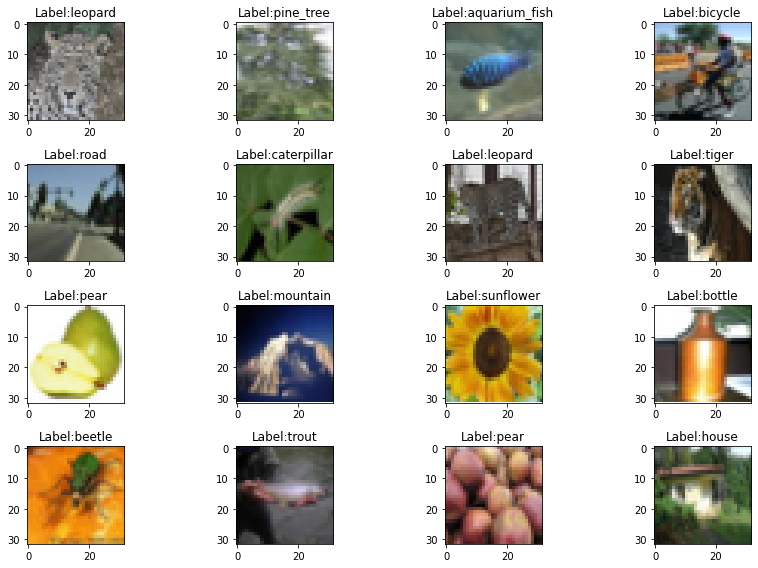

In [ ]:
import numpy as np
# 재연성을 위하여 랜덤시드 고정
np.random.seed(1234) 

samples = np.random.randint(0,len(X_train)+1,size=16)


plt.figure(figsize=(12,8))


for count, n in enumerate(samples,start=1):
    plt.subplot(4, 4, count)
    plt.imshow(X_train[n], interpolation='nearest')
    label_name = "Label:" + str(label_list[y_train[n][0]])
    plt.title(label_name)

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical,plot_model
# 데이터 크기 조정(Data Reshape)
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_valid = X_valid.reshape(X_valid.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)

# 데이터 포맷 바꾸기
# 정수(int)인 데이터에서 실수(float)으로 변환
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

# 데이터 정규화(Data Regularization)
# 이 과정을 통해서 추후 학습할 신경망이 조금 더 학습이 원할히 될 수 있게함
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

# 원-핫 인코딩(One Hot Encoding)
# Keras의 to_categorical함수를 통해서 모든 Train 데이터의 레이블을 벡터화(Vectorize)
# ex) [3] -> [0 0 0 1 0 0 0 0 0 0]
y_train = to_categorical(y_train, 100) 
y_valid = to_categorical(y_valid,100)
y_test = to_categorical(y_test, 100)

In [ ]:
from tensorflow.keras.applications import VGG16
# CIFAR-10의 이미지 형태
INPUT_SHAPE = (32, 32, 3)

# VGG16 객체 생성
base_model = VGG16(input_shape=INPUT_SHAPE,  # CIFAR-10의 이미지 형태
                      include_top=False,  # FC Layer를 제거
                      weights='imagenet')

# ResNet50의 모든 Layer를 Freezing
base_model.trainable = True

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv2D,GlobalAveragePooling2D
model = Sequential()

model.add(base_model) # ResNet50 추가
model.add(GlobalAveragePooling2D()) # Transfer Learning을 진행할때 항상 GAP Layer 추가
model.add(Dense(len(label_list), activation='softmax')) # 분류할 FC Layer 추가

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy
model.compile(loss=categorical_crossentropy, 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['acc','categorical_accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               51300     
Total params: 14,765,988
Trainable params: 14,765,988
Non-trainable params: 0
_________________________________________________________________


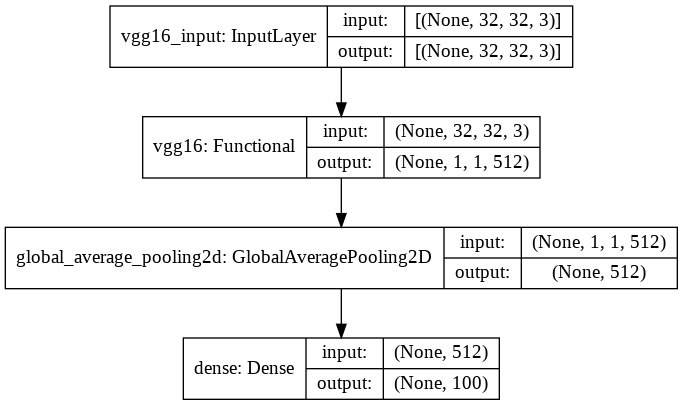

In [ ]:
model.summary()

plot_model(model, to_file='./cifar100_resnet_model.png', show_shapes=True)

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32

In [ ]:
history = model.fit(X_train,  # 학습할 데이터
                    y_train,  # 학습할 레이블
                    epochs=EPOCHS,  # 전체 학습할 횟수
                    batch_size=BATCH_SIZE,  # 배치 사이즈
                    use_multiprocessing=True,
                    validation_data=(X_valid, y_valid) # 검증 데이터로 확인
                   )

20210621 딥러닝 수업
--

arg min (MSE)를 최소화